In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam, RMSprop,Adagrad
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\wretc\Downloads\Compressed\A_Z Handwritten Data.csv\A_Z Handwritten Data.csv").astype('float32')

print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

In [3]:
X = data.drop('0',axis = 1)
y = data['0']

In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [5]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

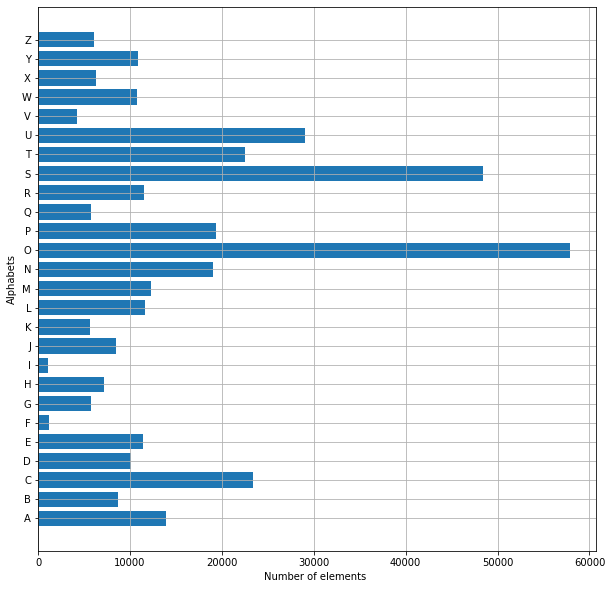

In [6]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

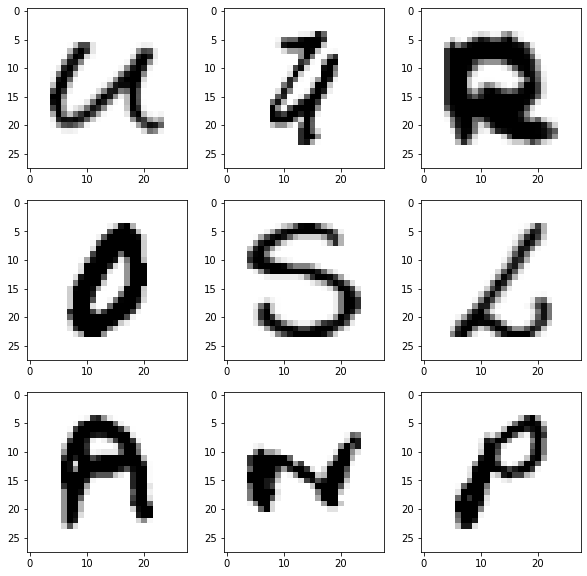

In [29]:
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [8]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [9]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [10]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [11]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_yOHE, epochs=10,  validation_data = (test_X,test_yOHE))

Epoch 1/10
9312/9312 [==============================] - 209s 22ms/step - loss: 0.4074 - accuracy: 0.9083 - val_loss: 0.0901 - val_accuracy: 0.9740
Epoch 2/10
9312/9312 [==============================] - 230s 25ms/step - loss: 0.0758 - accuracy: 0.9785 - val_loss: 0.0891 - val_accuracy: 0.9751
Epoch 3/10
9312/9312 [==============================] - 220s 24ms/step - loss: 0.0615 - accuracy: 0.9825 - val_loss: 0.0607 - val_accuracy: 0.9846
Epoch 4/10
9312/9312 [==============================] - 234s 25ms/step - loss: 0.0543 - accuracy: 0.9848 - val_loss: 0.0680 - val_accuracy: 0.9830
Epoch 5/10
9312/9312 [==============================] - 238s 26ms/step - loss: 0.0533 - accuracy: 0.9859 - val_loss: 0.0671 - val_accuracy: 0.9839
Epoch 6/10
9312/9312 [==============================] - 231s 25ms/step - loss: 0.0484 - accuracy: 0.9871 - val_loss: 0.0755 - val_accuracy: 0.9813
Epoch 7/10
9312/9312 [==============================] - 248s 27ms/step - loss: 0.0486 - accuracy: 0.9873 - val_loss: 0

In [ ]:
model.compile(optimizer = SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model.fit(train_X, train_yOHE, epochs=10,  validation_data = (test_X,test_yOHE))

In [ ]:
model.compile(optimizer = RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(train_X, train_yOHE, epochs=10,  validation_data = (test_X,test_yOHE))

In [ ]:
model.compile(optimizer = Adagrad(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model.fit(train_X, train_yOHE, epochs=10,  validation_data = (test_X,test_yOHE))

In [ ]:
model.summary()
model.save(r'model_hand.h5')

In [23]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9739696383476257, 0.9750704765319824, 0.9846153855323792, 0.9830178618431091, 0.9839172959327698, 0.9813263416290283, 0.9807088375091553, 0.9845348596572876, 0.9839978814125061, 0.9863874316215515]
The training accuracy is : [0.9551617503166199, 0.9794804453849792, 0.9824540019035339, 0.9843938946723938, 0.985555112361908, 0.9863370656967163, 0.9868069291114807, 0.9874983429908752, 0.9877768754959106, 0.988132655620575]
The validation loss is : [0.09009532630443573, 0.08906620740890503, 0.060653556138277054, 0.06802795827388763, 0.06705775111913681, 0.075539231300354, 0.08289296925067902, 0.07246799021959305, 0.08006445318460464, 0.06823966652154922]
The training loss is : [0.16704897582530975, 0.07378745079040527, 0.06221756339073181, 0.056384481489658356, 0.05439779534935951, 0.05182068422436714, 0.05073771998286247, 0.05002744495868683, 0.049054283648729324, 0.050112806260585785]


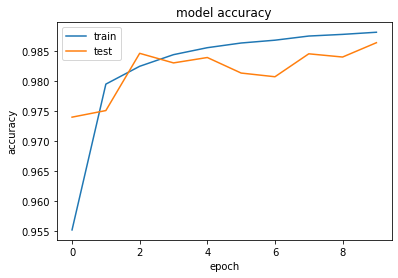

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
print("The validation accuracy is :", history1.history['val_accuracy'])
print("The training accuracy is :", history1.history['accuracy'])
print("The validation loss is :", history1.history['val_loss'])
print("The training loss is :", history1.history['loss'])

The validation accuracy is : [0.952329158782959, 0.9741307497024536, 0.9805745482444763, 0.9799838662147522, 0.9834474325180054, 0.9824405908584595, 0.9857430458068848, 0.9864948391914368, 0.9870586395263672, 0.9875687956809998]
The training accuracy is : [0.9245603680610657, 0.9726741909980774, 0.9790206551551819, 0.9828500747680664, 0.9851523637771606, 0.9868035912513733, 0.988283634185791, 0.9894146919250488, 0.990565836429596, 0.9912974834442139]
The validation loss is : [0.1561034768819809, 0.09135666489601135, 0.07127515226602554, 0.06929708272218704, 0.059407997876405716, 0.05967490375041962, 0.05086222290992737, 0.049011509865522385, 0.0450170524418354, 0.04515771195292473]
The training loss is : [0.27296680212020874, 0.09780553728342056, 0.07476340234279633, 0.06216728687286377, 0.05388833209872246, 0.047238968312740326, 0.04220055788755417, 0.03777668997645378, 0.034064970910549164, 0.030705949291586876]


In [ ]:
print("The validation accuracy is :", history2.history['val_accuracy'])
print("The training accuracy is :", history2.history['accuracy'])
print("The validation loss is :", history2.history['val_loss'])
print("The training loss is :", history2.history['loss'])

In [ ]:
print("The validation accuracy is :", history3.history['val_accuracy'])
print("The training accuracy is :", history3.history['accuracy'])
print("The validation loss is :", history3.history['val_loss'])
print("The training loss is :", history3.history['loss'])

In [31]:
pred = model.predict(test_X[:9])
print(test_X.shape)

(74490, 28, 28, 1)


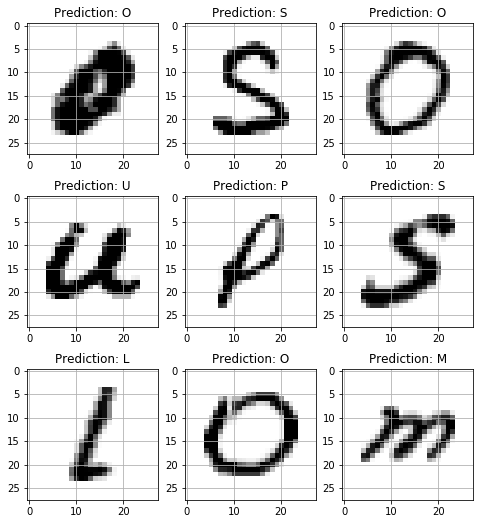

In [32]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [37]:
img = cv2.imread(r'C:\Users\wretc\Downloads\z.jpg')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

In [38]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [39]:
img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "_ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Handwritten character recognition _ _ _ ', img)

In [ ]:
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()